# Implementation of K Means Clustering

Aim: To demonstrate K Means Clustering on a dataset. The resultant parameters are used as the initial parameters to the Gaussian Mixture model.


k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

Introduction:

K Means algorithm is an unsupervised learning algorithm which means, it needs no training data, it performs the computation on the actual dataset. This should be apparent from the fact that in K Means, we are just trying to group similar data points into clusters, there is no prediction involved.

Math: The output is a set of ‘k’ cluster centroids and a labeling of the dataset that maps each of the data points to a unique cluster

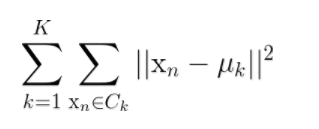

In [1]:
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (9, 6)
plt.style.use('ggplot')

Dataset information: Dataset.csv has two attributes and 2000 data samples are considered for our implementation.
The dataset can be classified into 2 clusters (K=2). The dataset is picked up from the following website:
https://mubaris.com/2017-10-01/kmeans-clustering-in-python

In [2]:
data = pd.read_csv('dataset.csv')
print(data.shape)


(2000, 2)


In [3]:
f1 = data['V1'].values
f2 = data['V2'].values

X = np.array(list(zip(f1, f2)))


This calculates the Euclidean distance between two distinct points. In our implementation we use to calculate the distance between a singular datapoint in the plain and the centroid. Mathematically this is represented as:

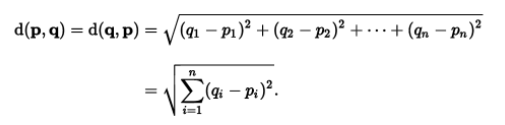

In [4]:
def dist(a, b, ax=1):
    
    return np.linalg.norm(a - b, axis=ax)

In our implementations, the dataset is divided into two clusters. Hence, k=2. Also, we consider random centroids of the data clusters. These are the initial values of the centroids and the corresponding graphical representation is also show. This is the initial setup before the clustering starts.

In [5]:
k = 2
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
centroids = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Random Centroids")
print(centroids)

Random Centroids
[[ 34.  19.]
 [ 53.   7.]]


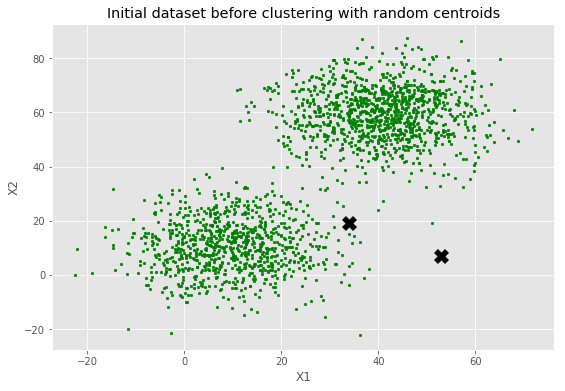

In [6]:
plt.scatter(f1, f2, c='g', s=7)
plt.scatter(C_x, C_y, marker='X', s=200, c='black')
plt.title('Initial dataset before clustering with random centroids')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

'old_centroids' are initialized to be a zereo matrix and so is cluster matrix. We then compute the initial error.

In [7]:
old_centroids = np.zeros(centroids.shape)
clusters = np.zeros(len(X))
error = dist(centroids, old_centroids, None)

Clustering process:

For all the datapoints in the plane, the Euclidean distance between the centroid (random data, initially) and the datapoint is calculated. Below is the complete procedure:

1) We compute the Euclidean distance between each instance in the dataset and the centroid. 

2) In the code snippet below, distances is an array of 2 values and we choose the minimum distance and    corresponding datapoint's index (0 or 1) is added to the cluster. 

3) Essentialy, in the end, the cluster is an array which contains either 0 or 1, 0 being cluster 1 and 1 being cluster 2.

4) Datapoints in each cluster are identified. Mean of datapoints in each cluster is computed which serves as new centroid points.

5) Also error value is calculated based on the difference between the old centroid values and new centroid values.

6) All the steps above are repeated until the error becomes 0.


In [8]:
cov1=[]
cov2=[]
while error != 0:

    for i in range(len(X)):
        #print X[i]
        distances = dist(X[i], centroids)
        cluster = np.argmin(distances)
        clusters[i] = cluster
   
    old_centroids = deepcopy(centroids)

    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        centroids[i] = np.mean(points, axis=0)
      
    error = dist(centroids, old_centroids, None)
    
   

Plotting the graph and Computation of mean, covariance and pi values:

To represent the clustering graphically, we use matplotlib to plot the datapoints. The datapoints are coloured based on the cluster it belongs to and centroids are represented by 'X'

To calculate the mean, covariance and pi, we add the datapoints to the respective clusters. Please note that the mean is the final centroids. Covariance is calculated using np.cov(cluster1) and np.cov(cluster2). Pi is the array of probalities.


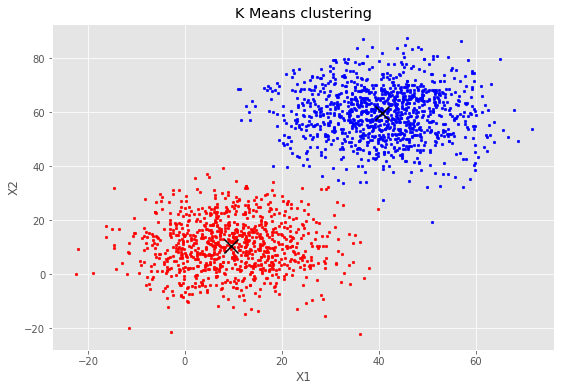

In [9]:
colors = ['b', 'r', 'g']
fig, ax = plt.subplots()
cluster1=[]
cluster2=[]
for i in range(k):
        
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
        if(i==0):
            cluster1 = deepcopy(points)
        else:
            cluster2 = deepcopy(points)
        
ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='#050505')
plt.title('K Means clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

cov1= np.cov(cluster1.T)
cov2= np.cov(cluster2.T)


These parameters are the initial parameters for the implementation of the Guassian mixed models.

In [10]:

pi1= float(cluster1.shape[0])/float(X.shape[0])
pi2= float(cluster2.shape[0])/float(X.shape[0])

print '\nThe value of mu1 and mu2 are ',centroids[0], centroids[1]
print '\nThe value of cov1 and cov2 are\n\n', cov1,'\n\n',cov2
print '\nThe value of pi1 and pi2 are',pi1, pi2


The value of mu1 and mu2 are  [ 40.6879158   59.60566711] [  9.50771332  10.64953709]

The value of cov1 and cov2 are

[[ 103.59049046   -2.70848508]
 [  -2.70848508   95.32143036]] 

[[ 104.63893395    2.36320236]
 [   2.36320236   97.27679937]]

The value of pi1 and pi2 are 0.55 0.45
